<a href="https://colab.research.google.com/github/hesther/teaching/blob/main/python101/Python_for_Beginners_Cheminfo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup RDKit
First, we need to install and import rdkit. If you are working on your local machine, you only need to install locally and skip this cell!

In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 47.5 MB/s eta 0:00:00


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors

# First inspection of RDKit
We can now make molecules from SMILES strings (but also from eg InChi identifiers, mol2 files, pdb files, etc).

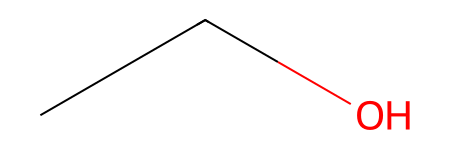

In [3]:
Chem.MolFromSmiles("CCO")

# Exercise:
Load the following SMILES strings and check which ones are valid:
smiles_list = ["CCO", "C1CCCCC1", "blabla", "CC(=O)O"]
* Which molecules are valid?
* Which one is acetic acid?

# Exploring rdkit molecule objects
There are many interesting properties stored for the whole molecule, and for each atom within:

In [29]:
mol = Chem.MolFromSmiles("CCO")
mol.GetNumAtoms()

3

In [30]:
mol.GetNumBonds()

2

In [32]:
for atom in mol.GetAtoms():
  print(atom.GetSymbol(), atom.GetHybridization(), atom.GetIsAromatic(), atom.IsInRing(), atom.GetTotalNumHs())

C SP3 False False 3
C SP3 False False 2
O SP3 False False 1


RDKit uses implicit hydrogens for computational efficiency. If you want the hydrogens to show up explicitly, you can add them:

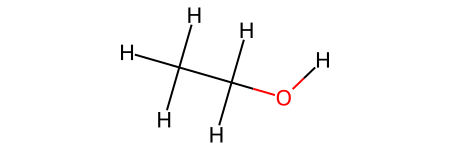

In [6]:
mol_h = Chem.AddHs(mol)
mol_h

In [7]:
mol_h.GetNumAtoms()

9

RDKit comes with many useful Descriptors and simple property predictors, for example the molecular weight, and the estimated water-octanol partition coefficient:

In [8]:
Descriptors.MolWt(mol)

46.069

In [9]:
Descriptors.MolLogP(mol)

-0.0014000000000000123

# Exercise
Go to https://pubchem.ncbi.nlm.nih.gov/, search for any molecule you might be interested in, and inspect it using RDKit. You can plot the structure, compute its number of atoms, look at different descriptors, etc.

# Plotting multiple molecules
We can plot molecules on a grid:

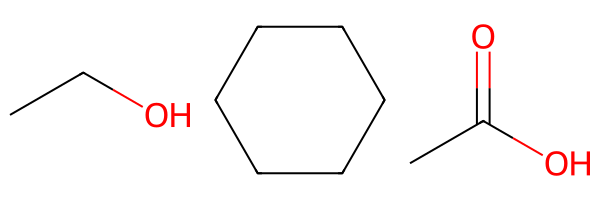

In [27]:
mols = [Chem.MolFromSmiles(s) for s in ["CCO", "C1CCCCC1", "CC(=O)O"]]
Draw.MolsToGridImage(mols, molsPerRow=3)

#Exercise
Make a grid visualization of the following molecules:
* Benzene: "c1ccccc1"
* Aspirin: "CC(=O)OC1=CC=CC=C1C(=O)O"
* Caffeine: "Cn1cnc2c1c(=O)n(c(=O)n2C)C"

# Stereochemistry
RDKit is also good in depicting and analysing stereochemistry. For example:

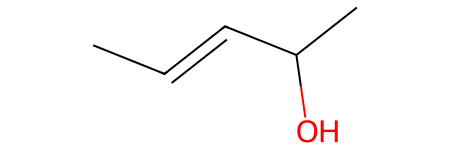

In [36]:
mol = Chem.MolFromSmiles('OC(C)C=CC')
mol

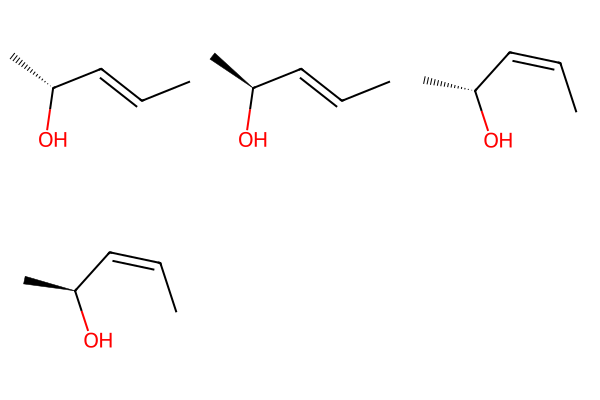

In [38]:
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers
isomers = list(EnumerateStereoisomers(mol))
Draw.MolsToGridImage(isomers, molsPerRow=3)

# Exercise
Enumerate all possible stereoisomers of cholesterol "CC(CCCC(C)C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C" and plot them on a grid

#Fingerprints and Similarity
Fingerprints are binary vectors representing molecular substructures.

In [42]:

from rdkit.Chem import DataStructs
mol1 = Chem.MolFromSmiles("CCO") # ethanol
mol2 = Chem.MolFromSmiles("CCCO") # propanol
fpgen = AllChem.GetMorganGenerator(radius=2)
fp1 = fpgen.GetFingerprint(mol1)
fp2 = fpgen.GetFingerprint(mol2)
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
print("Tanimoto similarity:", similarity)

Tanimoto similarity: 0.5555555555555556


# Exercise:
Compute the pairwise similarities between:
* Propanol "CCCO"
* Butanol "CCCCO"
* Acetic acid "CC(=O)O"

Which molecules are most similar?

# Wrap-Up
You now know how to:
* Load molecules with SMILES
* Visualize molecules
* Compute descriptors and fingerprints
* Perform similarity analysis

We will now use all these skills in a cool application

# Application: Can a molecule bind to a protein?
Using the DUD-E database of ligands and decoys that bind (and do not bind) to proteins, we will now explore how to visualize multiple molecules and how to compute descriptors for them.
We will choose FAK1, the focal adhesion kinase 1. Download the files `actives_final.sdf.gz` and `decoys_final.sdf.gz` from DUD-E (https://dude.docking.org//targets/fak1).

In [10]:
!wget https://dude.docking.org//targets/fak1/actives_final.sdf.gz
!gunzip actives_final.sdf.gz
!wget https://dude.docking.org//targets/fak1/decoys_final.sdf.gz
!gunzip decoys_final.sdf.gz

--2025-09-26 15:24:08--  https://dude.docking.org//targets/fak1/actives_final.sdf.gz
Resolving dude.docking.org (dude.docking.org)... 169.230.26.169
Connecting to dude.docking.org (dude.docking.org)|169.230.26.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘actives_final.sdf.gz’

actives_final.sdf.g     [  <=>               ]  79.94K   292KB/s    in 0.3s    

2025-09-26 15:24:09 (292 KB/s) - ‘actives_final.sdf.gz’ saved [81863]

gzip: actives_final.sdf already exists; do you wish to overwrite (y or n)? y
--2025-09-26 15:24:13--  https://dude.docking.org//targets/fak1/decoys_final.sdf.gz
Resolving dude.docking.org (dude.docking.org)... 169.230.26.169
Connecting to dude.docking.org (dude.docking.org)|169.230.26.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘decoys_final.sdf.gz’

decoys_final.sdf.gz     [          <=>       ]   4.07M   690K

In [11]:
mols = [x for x in Chem.SDMolSupplier("actives_final.sdf")]

/usr/local/lib/python3.12/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


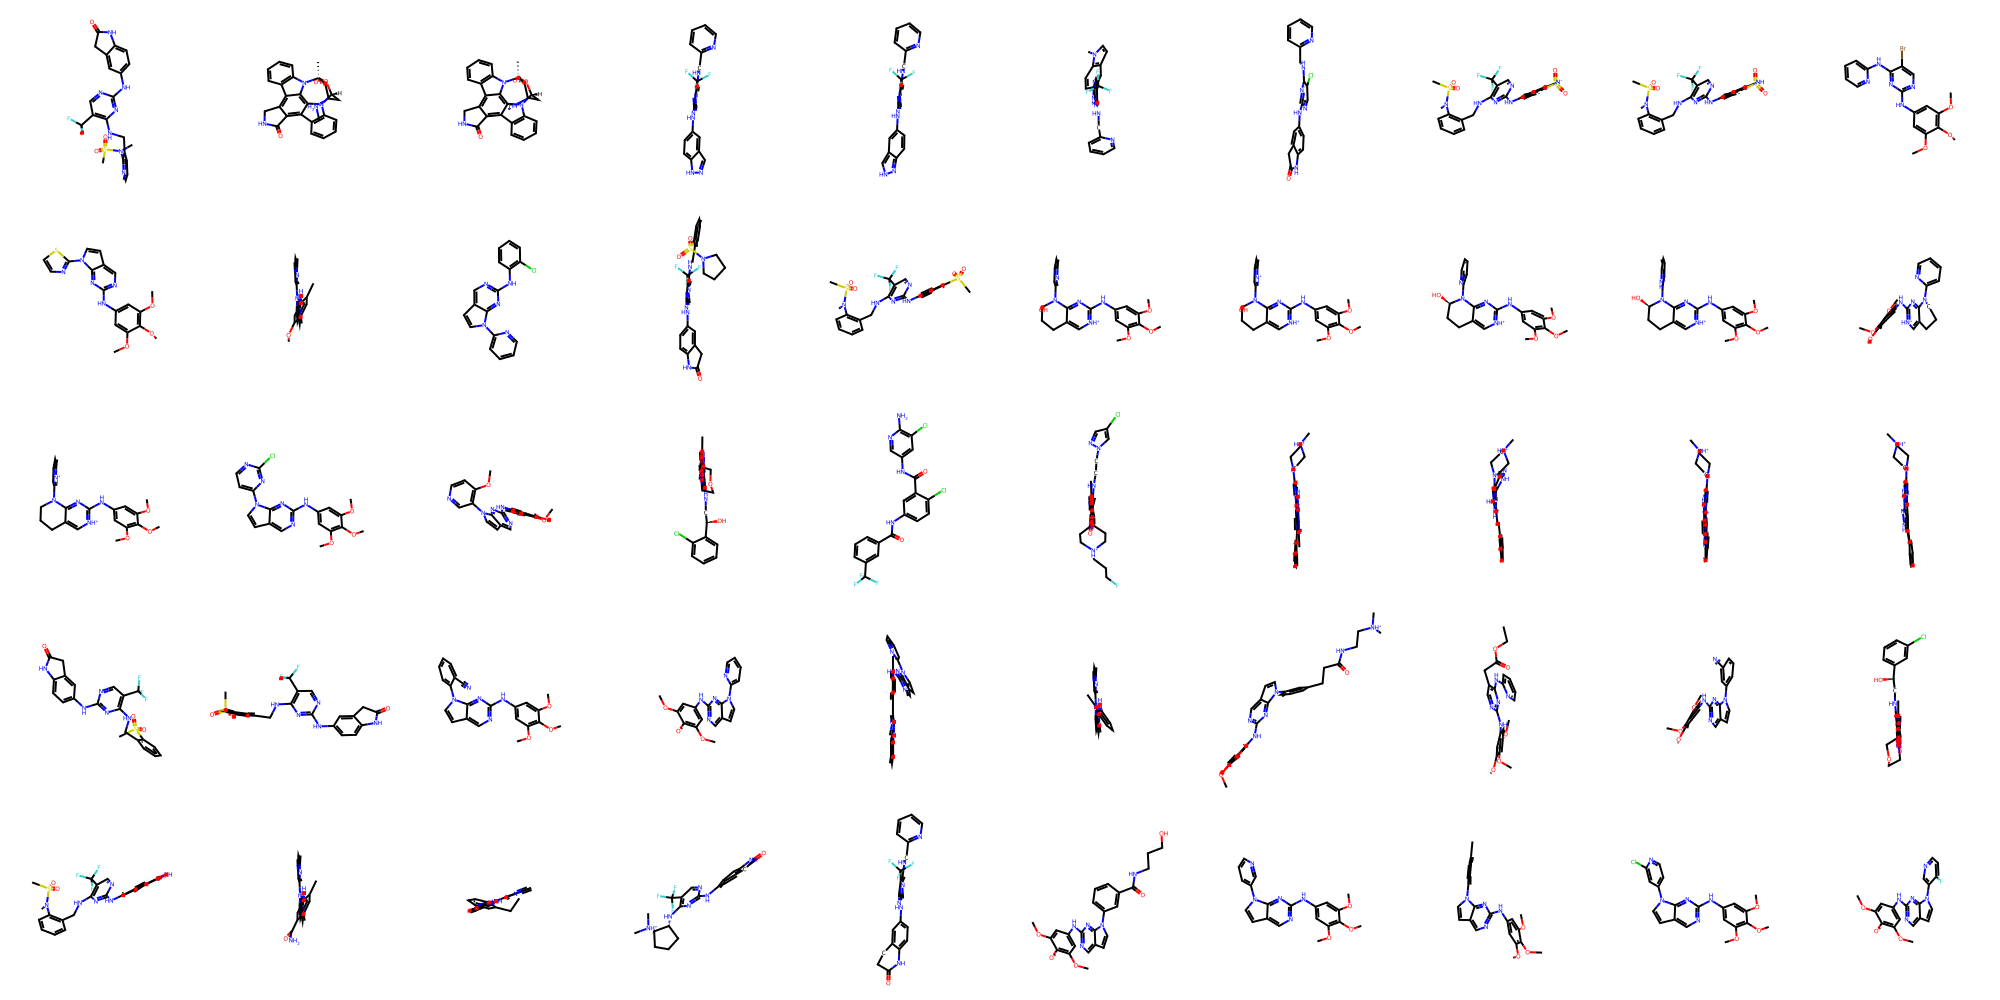

In [12]:
Draw.MolsToGridImage(mols,molsPerRow=10)

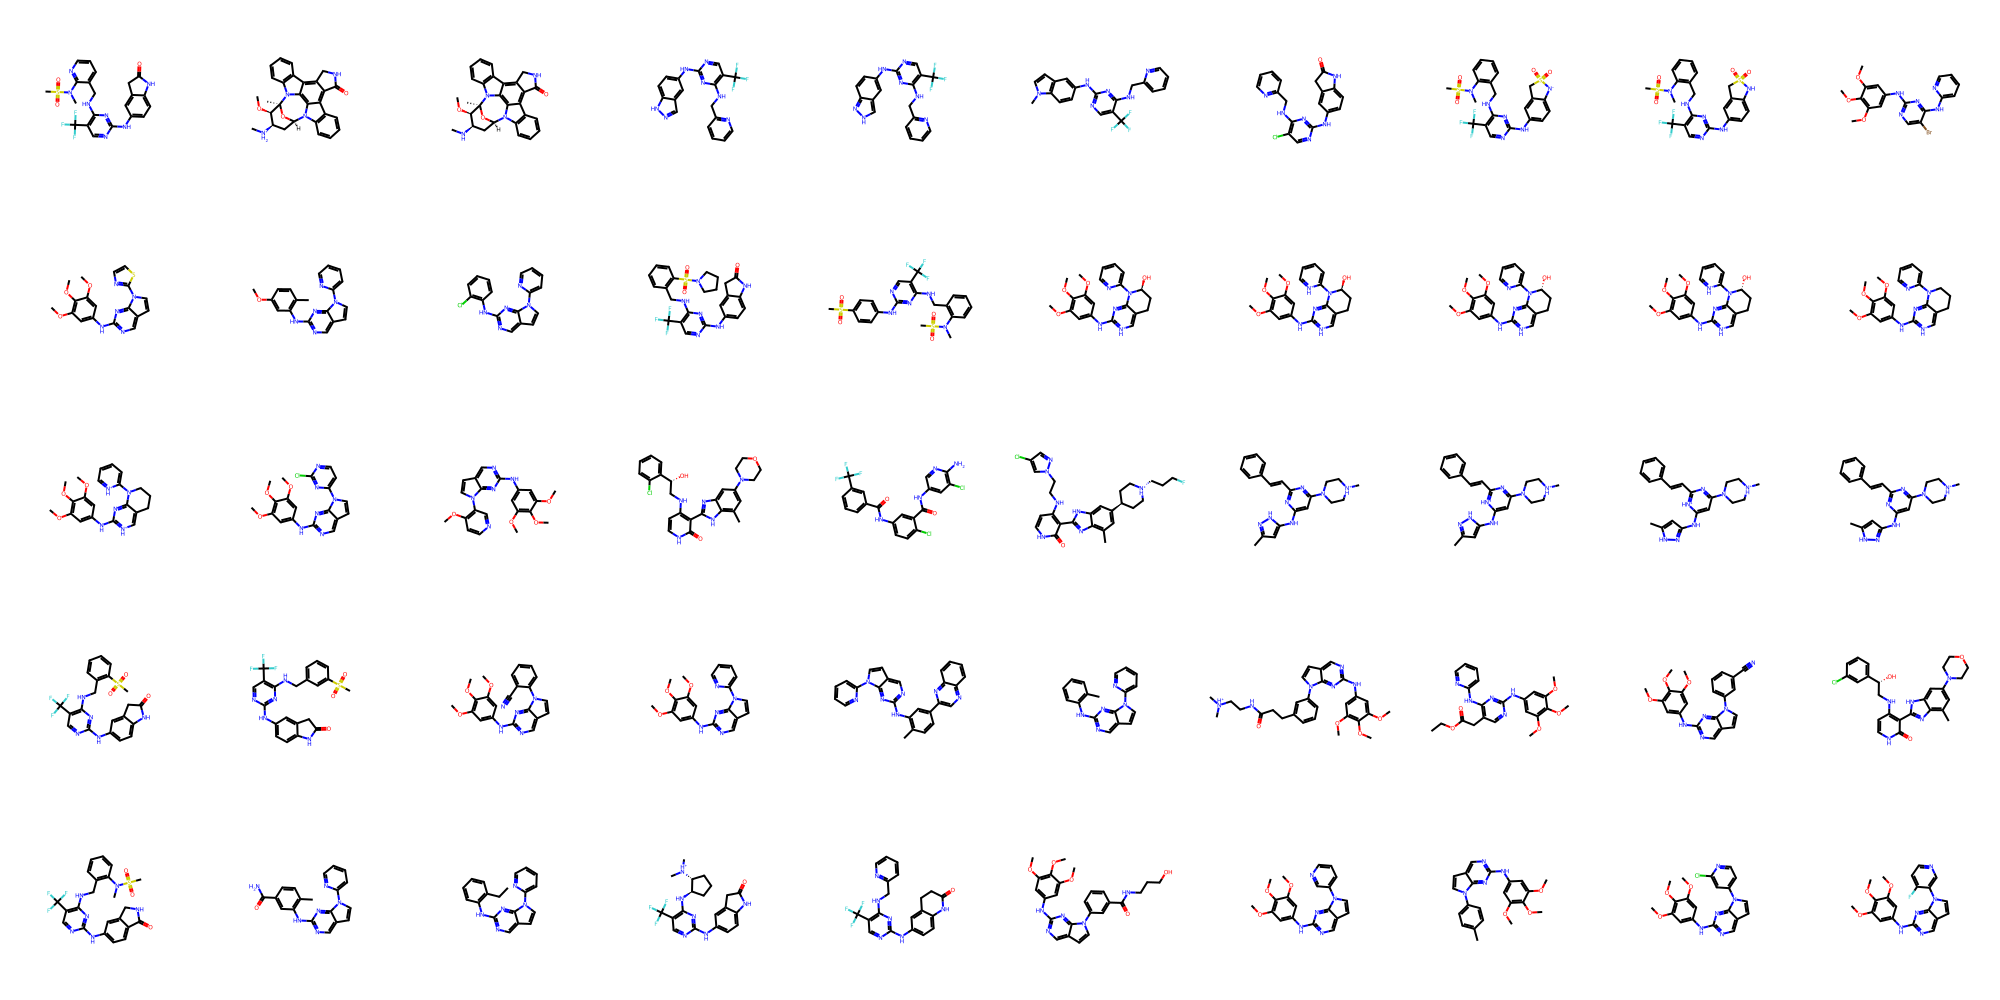

In [13]:
for mol in mols:
    mol.RemoveAllConformers()
Draw.MolsToGridImage(mols,molsPerRow=10)

We can also put labels on the grid:

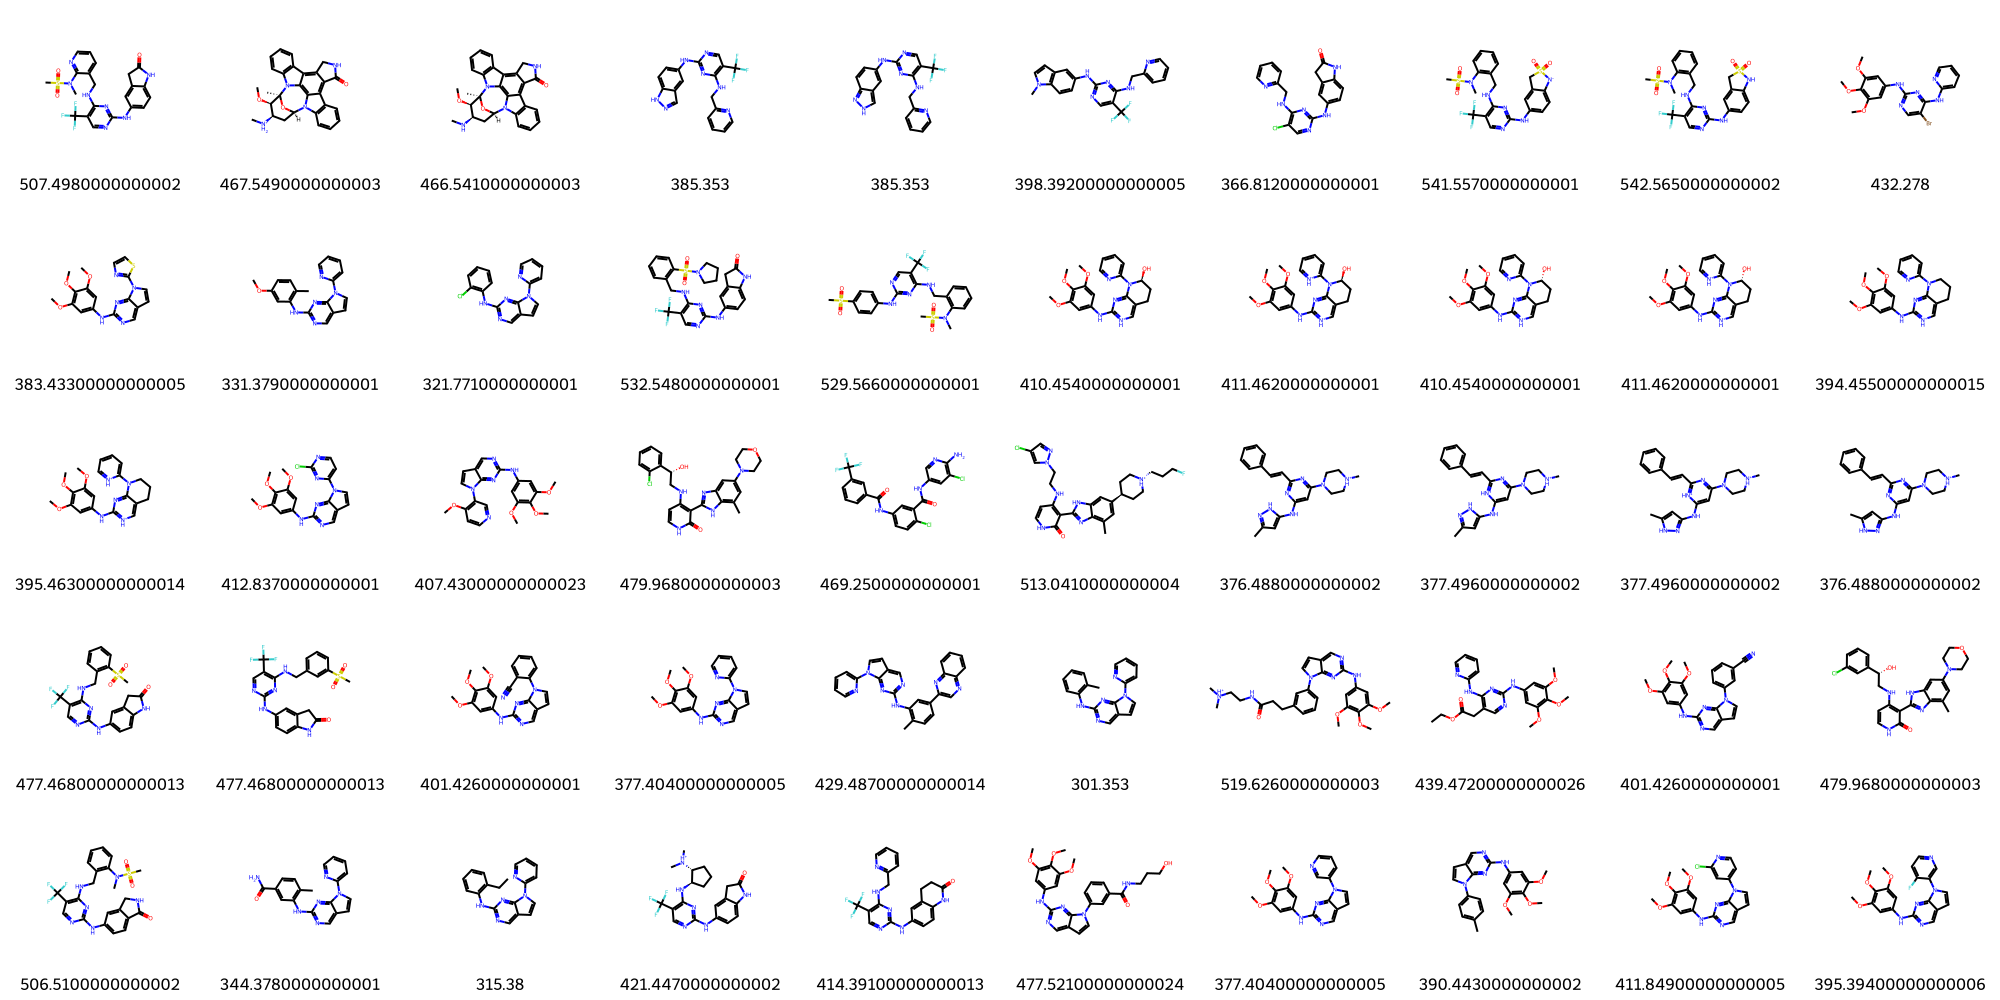

In [14]:
labels = [str(Descriptors.MolWt(mol)) for mol in mols]
Draw.MolsToGridImage(mols,molsPerRow=10, legends=labels)

DUD-E claims that the decoys match the actives in most cheminformatics descriptors, e.g. size and weight ranges, functional groups, etc. Let's check that:

In [18]:
import numpy as np

mols_decoys_all = [x for x in Chem.SDMolSupplier("decoys_final.sdf")]
#Randomly select 100:
mols_decoys = np.random.choice(mols_decoys_all, 100, replace=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x79a6b843ea20>,
 'caps': [<matplotlib.lines.Line2D at 0x79a6b843efc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a6b843e780>,
 'medians': [<matplotlib.lines.Line2D at 0x79a6b843f470>,
 'fliers': [<matplotlib.lines.Line2D at 0x79a6b843f770>,
 'means': []}

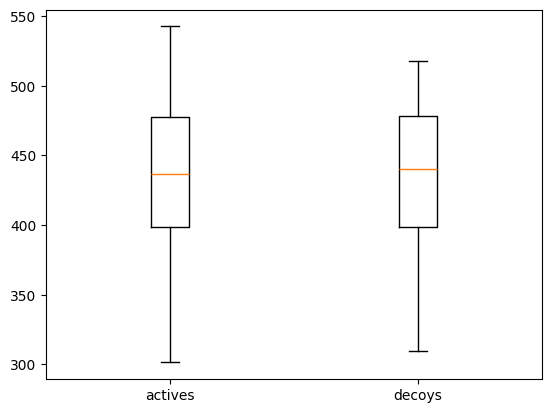

In [19]:
import matplotlib.pyplot as plt

weights = [[Descriptors.MolWt(mol) for mol in mols],
           [Descriptors.MolWt(mol) for mol in mols_decoys]]
plt.boxplot(weights, tick_labels=['actives','decoys'])

In [21]:
desc_actives = np.array([list(Descriptors.CalcMolDescriptors(mol).values()) for mol in mols])
desc_decoys = np.array([list(Descriptors.CalcMolDescriptors(mol).values()) for mol in mols_decoys])
desc_all = np.concat([desc_actives, desc_decoys])
desc_actives.shape, desc_decoys.shape, desc_all.shape

((114, 217), (100, 217), (214, 217))

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(desc_all)
transformed_actives = pca.transform(desc_actives)
transformed_decoys = pca.transform(desc_decoys)
transformed_actives.shape

(114, 2)

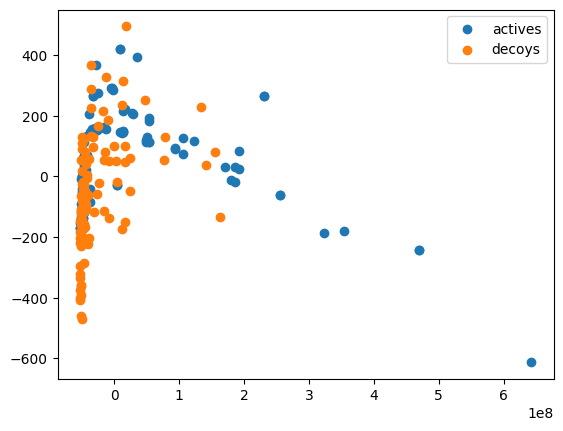

In [27]:
plt.scatter(transformed_actives[:,0],transformed_actives[:,1], label='actives')
plt.scatter(transformed_decoys[:,0],transformed_decoys[:,1], label='decoys')
plt.legend()

Seems like DUD-E did a pretty good job after all! But maybe we can compare the similarity of a known ligand to the actives and decoys to discern between them?

In [36]:
!wget https://dude.docking.org//targets/fak1/crystal_ligand.mol2

--2025-09-26 15:41:46--  https://dude.docking.org//targets/fak1/crystal_ligand.mol2
Resolving dude.docking.org (dude.docking.org)... 169.230.26.169
Connecting to dude.docking.org (dude.docking.org)|169.230.26.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5323 (5.2K) [application/x-not-regular-file]
Saving to: ‘crystal_ligand.mol2’

crystal_ligand.mol2 100%[===================>]   5.20K  --.-KB/s    in 0s      

2025-09-26 15:41:46 (73.4 MB/s) - ‘crystal_ligand.mol2’ saved [5323/5323]



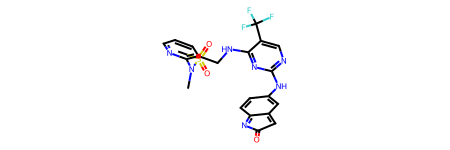

In [38]:
ligand = Chem.MolFromMol2File("crystal_ligand.mol2")
ligand

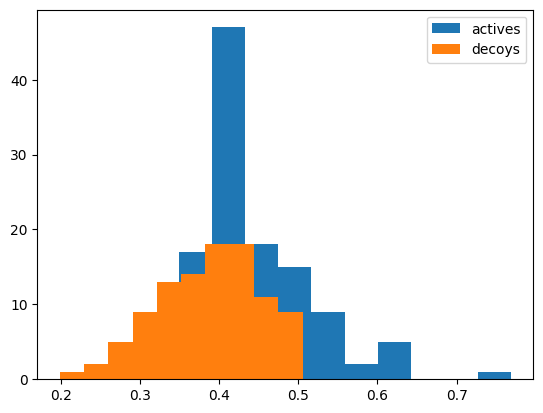

In [43]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

fpgen = AllChem.GetRDKitFPGenerator()

fps_ligand = fpgen.GetFingerprint(ligand)
fps_actives = [fpgen.GetFingerprint(x) for x in mols]
fps_decoys = [fpgen.GetFingerprint(x) for x in mols_decoys]

sims_actives = [DataStructs.TanimotoSimilarity(fps_ligand,fp) for fp in fps_actives]
sims_decoys = [DataStructs.TanimotoSimilarity(fps_ligand,fp) for fp in fps_decoys]

plt.hist(sims_actives, label='actives')
plt.hist(sims_decoys, label='decoys')
plt.legend()

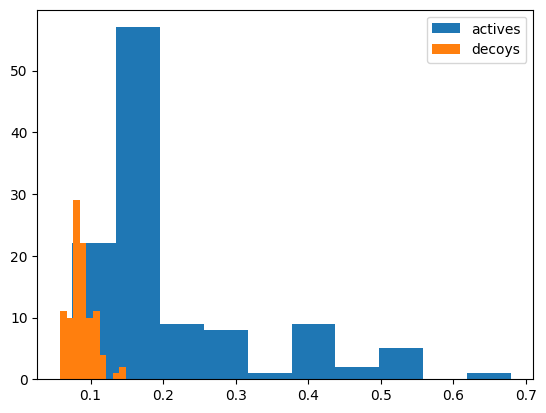

In [44]:
fpgen = AllChem.GetMorganGenerator(radius=2)

fps_ligand = fpgen.GetFingerprint(ligand)
fps_actives = [fpgen.GetFingerprint(x) for x in mols]
fps_decoys = [fpgen.GetFingerprint(x) for x in mols_decoys]

sims_actives = [DataStructs.TanimotoSimilarity(fps_ligand,fp) for fp in fps_actives]
sims_decoys = [DataStructs.TanimotoSimilarity(fps_ligand,fp) for fp in fps_decoys]

plt.hist(sims_actives, label='actives')
plt.hist(sims_decoys, label='decoys')
plt.legend()